Autoencoder

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
Reshape, LeakyReLU as LR,\
Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Model, Sequential

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
InputModel = Input(shape=(28,28))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(28, activation='sigmoid')(EncodedLayer)
AutoencoderModel = Model(InputModel, DecodedLayer)
# we can summarize our model.
AutoencoderModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 dense (Dense)               (None, 28, 32)            928       
                                                                 
 dense_1 (Dense)             (None, 28, 28)            924       
                                                                 
Total params: 1,852
Trainable params: 1,852
Non-trainable params: 0
_________________________________________________________________


In [5]:
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
history = AutoencoderModel.fit(x_train, x_train,

batch_size=256,
epochs=100,
shuffle=True,
validation_data=(x_test, x_test))

# Make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(x_test)

Epoch 1/100
235/235 [==============================] - 3s 8ms/step - loss: 0.7005 - val_loss: 0.7006
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6997 - val_loss: 0.6997
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6987 - val_loss: 0.6987
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6977 - val_loss: 0.6976
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6966 - val_loss: 0.6965
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6954 - val_loss: 0.6953
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6942 - val_loss: 0.6940
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6930 - val_loss: 0.6927
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6917 - val_loss: 0.6914
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6904 - val_l

In [7]:
DecodedDigits = AutoencoderModel.predict(x_test)

313/313 [==============================] - 0s 966us/step


In [8]:
def plotmodelhistory(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Autoencoder Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

dict_keys(['loss', 'val_loss'])


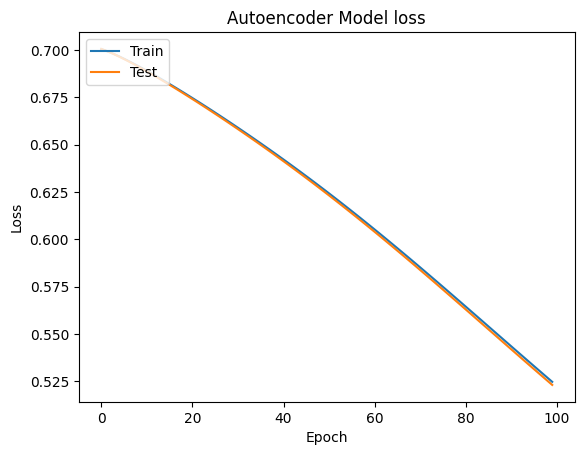

In [9]:
# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

In [10]:
# Acquire MNIST data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
# Reshape data for an MLP input
import numpy as np
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

In [12]:
# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

In [14]:
input_dim = 28*28
latent_vec_dim = 16
input_layer = Input(shape=(input_dim,))

In [15]:
# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(latent_vec_dim, activation='tanh')(input_layer)
encoder = enc_layer_1
# Then build the decoder
dec_layer_1 = Dense(input_dim, activation='sigmoid')(encoder)
decoder = dec_layer_1
# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder)
# Latent representation (Optional)
latent_model = Model(input_layer, encoder)
# Get summary
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


In [16]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
history = autoencoder.fit(train_images, train_images, epochs=70,
validation_data=(test_images, test_images))

Epoch 1/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - val_loss: 0.2632
Epoch 2/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2632 - val_loss: 0.2627
Epoch 3/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2630 - val_loss: 0.2626
Epoch 4/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - val_loss: 0.2463
Epoch 5/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2447 - val_loss: 0.2376
Epoch 6/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2281 - val_loss: 0.2207
Epoch 7/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2122 - val_loss: 0.2058
Epoch 8/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2002 - val_loss: 0.1942
Epoch 9/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1921 - val_loss: 0.1866
Epoch 10/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.185

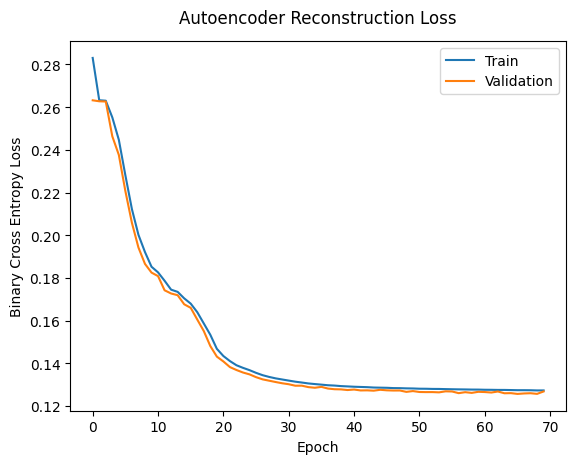

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

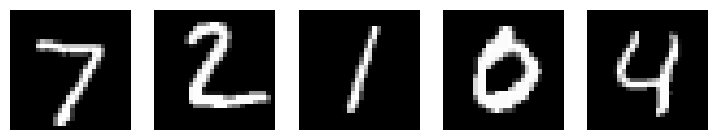

In [19]:
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

313/313 [==============================] - 0s 794us/step


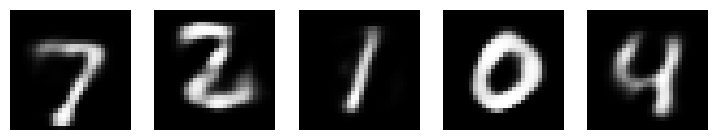

In [20]:
# Testing the model by reconstructing
reconstructed_images = autoencoder.predict(test_images)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

DEEP ARCHITECTURE

In [21]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
input_dim = 28*28
latent_vec_dim = 16
input_layer = Input(shape=(input_dim,))

In [22]:
# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(500, activation='sigmoid')(input_layer)
enc_layer_2 = Dense(300, activation='sigmoid')(enc_layer_1)
enc_layer_3 = Dense(100, activation='sigmoid')(enc_layer_2)
enc_layer_4 = Dense(latent_vec_dim, activation='tanh')(enc_layer_3)
encoder = enc_layer_4

In [23]:
# Then build the decoder
dec_layer_1 = Dense(100, activation='sigmoid')(encoder)
dec_layer_2 = Dense(300, activation='sigmoid')(dec_layer_1)
dec_layer_3 = Dense(500, activation='sigmoid')(dec_layer_2)
dec_layer_4 = Dense(input_dim, activation='sigmoid')(dec_layer_3)
decoder = dec_layer_4

In [24]:
# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder)
# Latent representation (Optional)
latent_model = Model(input_layer, encoder)
# Get summary
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dense_5 (Dense)             (None, 300)               150300    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 16)                1616      
                                                                 
 dense_8 (Dense)             (None, 100)               1700      
                                                                 
 dense_9 (Dense)             (None, 300)               3030

In [26]:
# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
# Train the autoencoder with MNIST data
history = autoencoder.fit(train_images, train_images, epochs=50, batch_size=128,
shuffle=True, validation_data=(test_images, test_images))

Epoch 1/50
469/469 [==============================] - 18s 34ms/step - loss: 0.1339 - val_loss: 0.1348
Epoch 2/50
469/469 [==============================] - 12s 27ms/step - loss: 0.1329 - val_loss: 0.1340
Epoch 3/50
469/469 [==============================] - 10s 21ms/step - loss: 0.1323 - val_loss: 0.1340
Epoch 4/50
469/469 [==============================] - 10s 21ms/step - loss: 0.1322 - val_loss: 0.1332
Epoch 5/50
469/469 [==============================] - 10s 21ms/step - loss: 0.1320 - val_loss: 0.1334
Epoch 6/50
469/469 [==============================] - 10s 22ms/step - loss: 0.1315 - val_loss: 0.1324
Epoch 7/50
469/469 [==============================] - 10s 22ms/step - loss: 0.1306 - val_loss: 0.1324
Epoch 8/50
469/469 [==============================] - 9s 20ms/step - loss: 0.1301 - val_loss: 0.1321
Epoch 9/50
469/469 [==============================] - 10s 22ms/step - loss: 0.1295 - val_loss: 0.1312
Epoch 10/50
469/469 [==============================] - 10s 21ms/step - loss: 0.1294

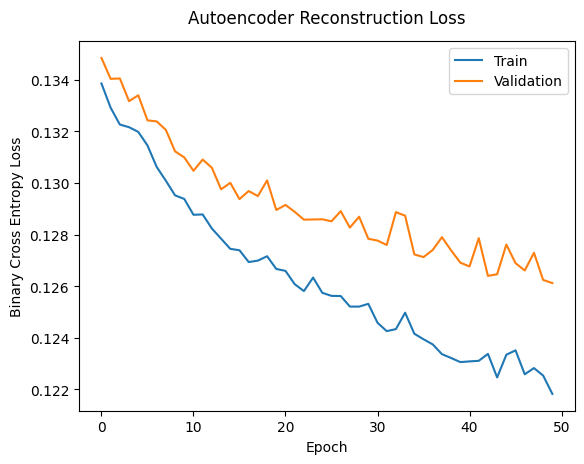

In [27]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

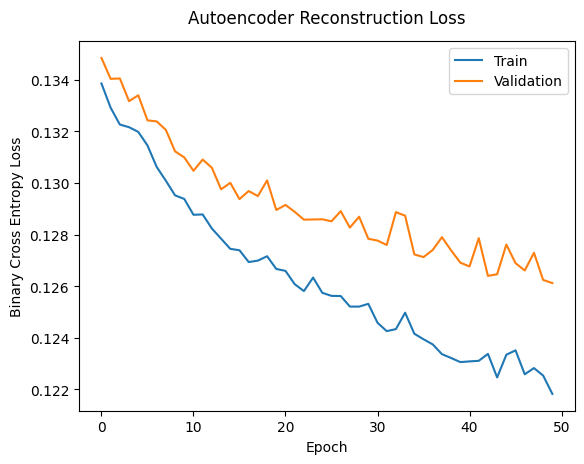

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

313/313 [==============================] - 1s 3ms/step


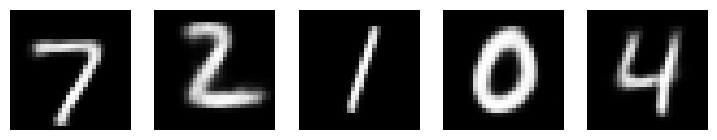

In [29]:
reconstructed_images = autoencoder.predict(test_images)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

CNN BASED AUTOENCODER

In [30]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248

In [31]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
autoencoder.fit(x_train, x_train,
epochs=2,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/2
235/235 [==============================] - 107s 452ms/step - loss: 0.1702 - val_loss: 0.0853
Epoch 2/2
235/235 [==============================] - 102s 433ms/step - loss: 0.0812 - val_loss: 0.0769


313/313 [==============================] - 4s 11ms/step


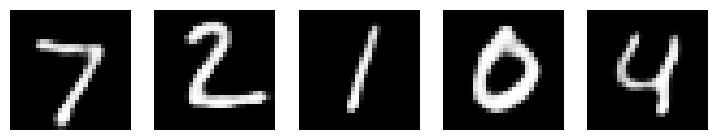

In [33]:
reconstructed_images = autoencoder.predict(x_test)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

NOISE AUTOENCODER

In [34]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

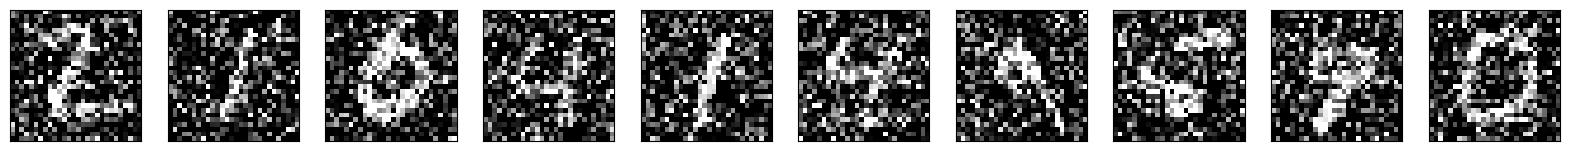

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [36]:
autoencoder.fit(x_train_noisy, x_train,

epochs=2,
batch_size=256,
shuffle=True,
validation_data=(x_test_noisy, x_test))

Epoch 1/2
235/235 [==============================] - 105s 447ms/step - loss: 0.1281 - val_loss: 0.1137
Epoch 2/2
235/235 [==============================] - 104s 441ms/step - loss: 0.1123 - val_loss: 0.1096


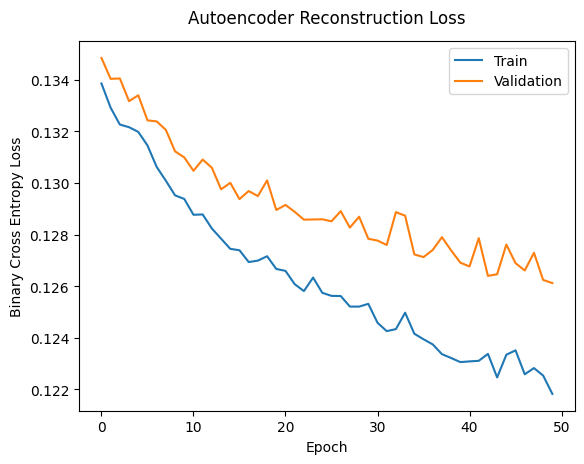

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

313/313 [==============================] - 4s 13ms/step


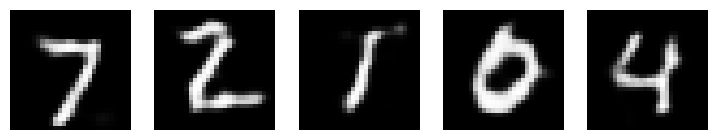

In [38]:
reconstructed_images = autoencoder.predict(x_test_noisy)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

STACKED ENCODER

Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1902 - val_loss: 0.1143
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1023 - val_loss: 0.0923
Epoch 3/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0899 - val_loss: 0.0852
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0841 - val_loss: 0.0818
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0808 - val_loss: 0.0787
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0785 - val_loss: 0.0770
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0769 - val_loss: 0.0756
Epoch 8/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0756 - val_loss: 0.0745
Epoch 9/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0745 - val_loss: 0.0734
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


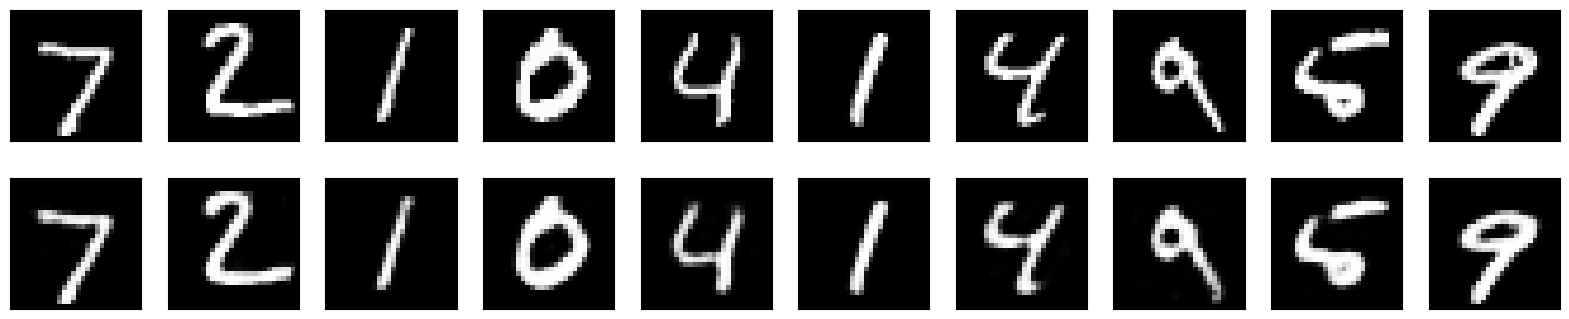

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Define the stacked encoder autoencoder architecture
model = Sequential()

# Encoder layers
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=128, activation='relu'))

# Decoder layers
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=784, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
model.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

# Generate reconstructed images
reconstructed_images = model.predict(x_test)

# Display original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
